# 2.3 matplotlib

# 1 overview

1. We've already generated quite a few figures in these lectures using Matplotlib.
   - Matplotlib is an outstanding graphics library, designed for scientific computing, with
     - high-equality 2D and 3D plots,
     - output in all the usual formats (PDF, PNG, etc.)
     - LaTeX integration
     - fine-grained control over all aspects of (**PI1: a**) presentation.
     - animation, etc.
     
## 1.1 matplotlib's split personality

1. Matplotlib is unusual in that it offers **two different interfaces to plotting**.
  - One is a simple **MATLAB-style API (Application Programming Interface)** that was written to help MATLAB refugees find a ready home.
  - The other is a more "**Pythonic" object-oriented API**.
2. For reasons descibed below, we recommend that we use the second API.
   - But first, let's discuss the difference.

# 2 the APIs

## 2.1 the matlab-style API

1. Here's the kind of easy example we might find in introductory treatments, see Program 1.
   - This is simple and convenient, but also somewhat **limited and un-Pythonic**.
     - e.g., in the function calls, a lot of objects get created and passed around without making themselves known to the programmer.
   - Python programmers tend to prefer a more **explicit style** of programming (run `import this` in a code block and look at the second line).
     - This leads us to the alternative, **object-oriented Matplotlib API**, see 2.1.

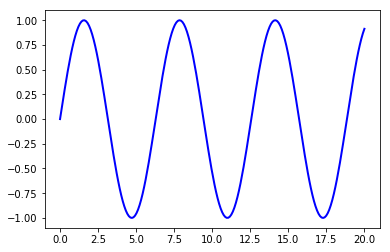

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.linspace(0, 20, 200)
y = np.sin(x)

# Program 1

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

## 2.2 the object-oriented API

1. Here's the code corresponding to the preceding figure(**PI:,**) using the object-oriented API, see Program 2(**PI:.**)
   - Here(**PI:,**) the call `fig, ax = plt.subplots()` returns a pair, where
     - `fig` is a `Figure` instance.
       - like a blank canvas.
     - `ax` is an `AxesSubplot` instance.
       - Think of a frame for plotting in.
   - The `plot()` function is actually a method of `ax`.
   - While there's a bit more typing, the more explicit use of objects gives us better control.
     - This will become more clear as we go along.

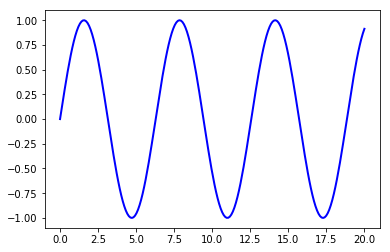

In [6]:
# Program 2

fig, ax = plt.subplots()
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

## 2.3 tweaks
1. Here we've made several improvements:
   - changed the **line** to **red**,
   - added a legend,
   - used `linewidth` to set up the width of the line,
   - used `alpha` to make the line slightly transparent.
     - which makes it look smoother.
2. The location of the legend can be changed by replacing `ax.legend()` with `ax.legend(loc='upper center')`, see Program 4.
3. If everything is properly configured, then adding LaTeX is trivial, see Program 5.
4. Controlling the ticks, adding titles and so on is (**PI2: are**) also straightforward.

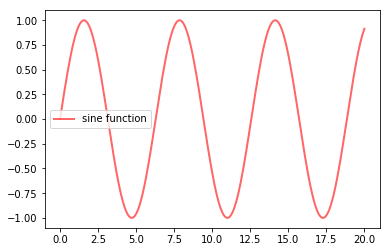

In [7]:
# Program 3

fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6) # set the color of the line
ax.legend() # add a legend.
plt.show()

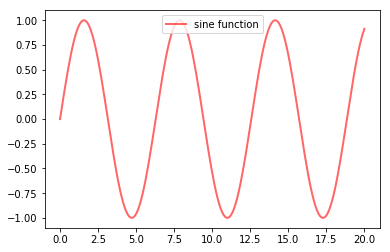

In [8]:
# Program 4

fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6) # set the color of the line
ax.legend(loc='upper center') # add a legend.
plt.show()

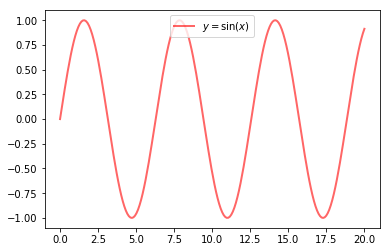

In [9]:
# Program 5

fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6) # set the color of the line
ax.legend(loc='upper center') # add a legend.
plt.show()

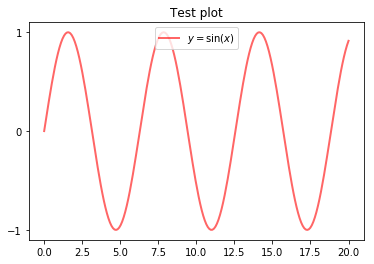

In [10]:
# Program 6

fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6) # set the color of the line
ax.legend(loc='upper center') # add a legend.
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
plt.show()

# 3 more features
1. Matplotlib has a huge array of functions and features, which we can discover over time as we have need for them.
   - We mention(**PI3: mentioned**) just a few.
## 3.1 multiple plots on one axis
1. It is straightforward to generate multiple plots on the same axes.
   - Here's an example that randomly generates three normal densities and adds a label with their mean, see Program 1.



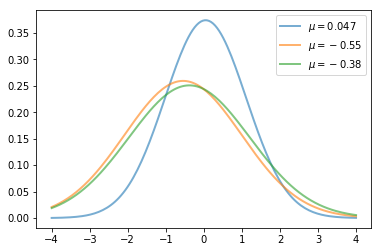

In [11]:
from scipy.stats import norm
from random import uniform

# Program 1

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2} $'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
    
ax.legend()
plt.show()

## 3.2 multiple subplots

1. Sometimes we want multiple subplots in one figure.
   - Here's an example that generates 6 histograms, see Program 2.

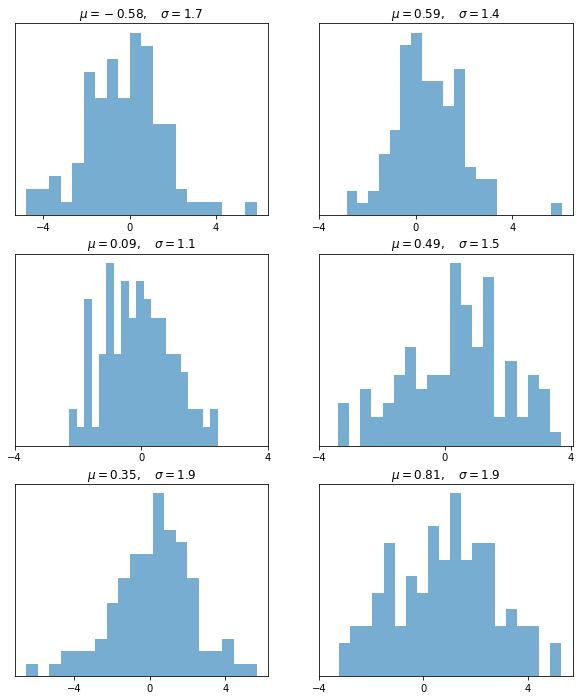

In [13]:
# Program 2

num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size= 100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2} $'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

## 3.3 3D plots
1. Matplotlib does a nice job of 3D plots.
   - Here is one example, see Program 3 (an example in 2.1).

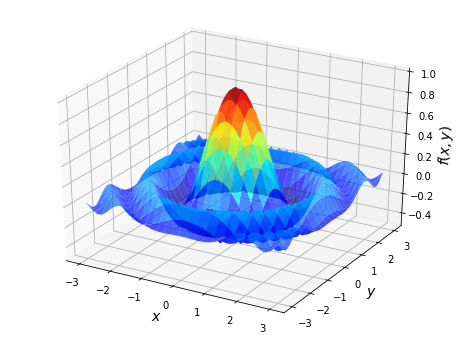

In [14]:
# Program 3

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

def f(x,y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
               y,
               f(x,y),
               rstride=2, cstride=2,
               cmap=cm.jet,
               alpha=0.7,
               linewidth=0.25)
ax.set_zlim(-0.5, 1.0)

# PI5: add labels
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.set_zlabel('$f(x,y)$', fontsize=14)
plt.show()

## 3.4 A customizing function

1. Perhaps we will find a set of customizations that we regularly use.
   - Suppose we usually prefer our axes to **go through the origin**, and to **have a grid**.
     - Here's a nice example from Matthew Doty of how the object-oriented API can be used to build a custom `subplots` function that implements these changes, see Program 4.
     - Read carefully through the code and see if we can follow what's going on.
2. See Program 4, the custom (**PI4: customized**) `subplots` function
   - calls the standard `plt.subplots` function internally to generate the `fig, ax` pair,
   - makes the desired customizations to `ax`, and
   - passes the `fig, ax` pair back to the calling code.

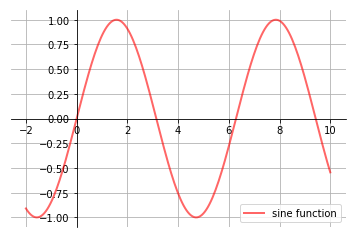

In [16]:
# Program 4

def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()
    
    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
        
    ax.grid()
    return fig, ax

fig, ax = subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()

# 4 further reading

1. The [Matplotlib gallery](https://matplotlib.org/gallery.html) provides many examples.
2. A nice [Matplotlib tutorial](http://scipy-lectures.org/intro/matplotlib/index.html)
3. [mpltools](http://tonysyu.github.io/mpltools/index.html) allows easy switching between plot styles.
4. [Seaborn](https://github.com/mwaskom/seaborn) facilitates common statistics plots in Matplotlib.

# 5 Exercises

In [17]:
def f(x, θ):
    return np.cos( np.pi * θ * x ) * np.exp(-x)

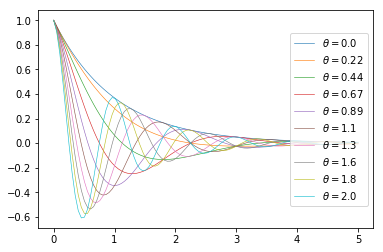

In [29]:
x_vals = np.linspace(0, 5, 100)
θ_vals = np.linspace(0, 2, 10)

fig, ax = plt.subplots()
for i in θ_vals:
    ax.plot(x_vals, f(x_vals, i), linewidth=0.6, alpha=1, label=f'$θ={i:0.2} $')
    
ax.legend(loc='right')
plt.show()